## Управляющие конструкции Python

Вернёмся к построению домика с помощью черепашьей графики. Для начала установим библиотеку `jturtle`.

In [12]:
%pip install -q jturtle

Вспоминим нашу функцию построения квадрата:

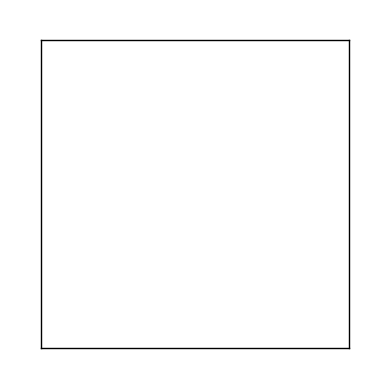

In [13]:
import jturtle as t

def square(x):
  t.forward(x)
  t.right(90)
  t.forward(x)
  t.right(90)
  t.forward(x)
  t.right(90)
  t.forward(x)
  t.right(90)

square(10)
t.done()

## Цикл `for` (со счетчиком)

Для начала немного поэкспериментируем с циклом: напечатаем слово "Привет" 10 раз:

In [14]:
for i in range(10):
  print('Привет')

Привет
Привет
Привет
Привет
Привет
Привет
Привет
Привет
Привет
Привет


Внутри тела цикла мы можем смотреть, какое по номеру повторение сейчас выполняется - для этого существует переменная `i`, которую мы указали в конструкции `for i ...`.

In [15]:
for i in range(10):
  print(f'Значение i={i}, а квадрат i равен {i*i}')

Значение i=0, а квадрат i равен 0
Значение i=1, а квадрат i равен 1
Значение i=2, а квадрат i равен 4
Значение i=3, а квадрат i равен 9
Значение i=4, а квадрат i равен 16
Значение i=5, а квадрат i равен 25
Значение i=6, а квадрат i равен 36
Значение i=7, а квадрат i равен 49
Значение i=8, а квадрат i равен 64
Значение i=9, а квадрат i равен 81


Обратите внимание, что здесь мы использовали так называемую **интерполяцию строк**, или **f-строку**: если перед строкой в кавычках поставить `f`, то внутри строки можно писать любые Python-выражения в фигурных скобках, и они будут вычисляться и подставляться внутрь строки.

Давайте поймём, как устроена конструкция `for` более детально. На самом деле `for var in ...` задаём сам цикл, а `range(10)` - это конструкция, задающая набор чисел от 0 до 9. Вместо `range` можно задать набор значений в явном виде, например, вот так мы можем поприветствовать студентов по заданному списку:

In [16]:
for name in ["Маша", "Петя", "Даша"]:
  print(f'Привет, {name}!')

Привет, Маша!
Привет, Петя!
Привет, Даша!


С учётом этого, упростим нашу функцию рисования квадрата:

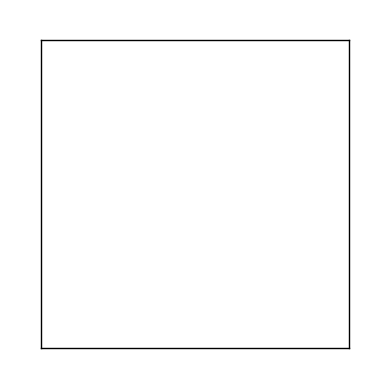

In [17]:
def square(x):
  for i in range(4):
    t.forward(x)
    t.right(90)

square(10)
t.done()

На самом деле, мы можем пойти ещё дальше, и использовать принцип **абстракции**, чтобы определить более общую функцию рисования n-угольника. Легко заметить, что рисование n-угольника будет отличаться лишь числом повторений цикла, и углом поворота:

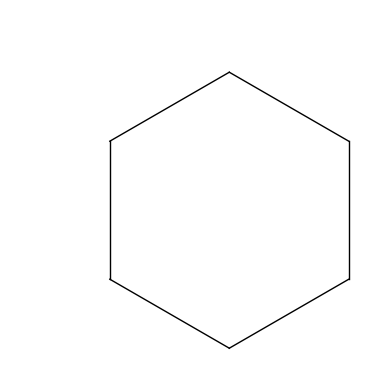

In [18]:
def poly(x,n):
  for i in range(n):
    t.forward(x)
    t.right(360/n)

poly(10,6)
t.done()


Теперь мы можем свести функцию `square` к одному вызову функции `poly`:

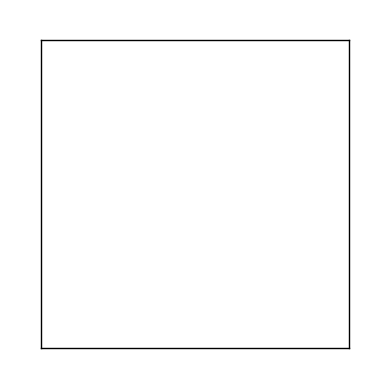

In [19]:
def square(x):
  poly(x,4)

def triangle(x):
  poly(x,3)

square(100)
t.done()


Это показывает важный принцип программирования (да и инженерии вообще) - иногда проще решить чуть более общую задачу, и потом свести ряд практических задач к ней. То есть размышляя над задачей, мы разбиваем её на подзадачи (**декомпозиция**), а затем для каждого из шагов пытаемся построить решение либо снова с помощью декомпозиции, либо сводя к какой-то более абстрактной задаче (**абстракция**).

> **Абстракция** и **декомпозиция** - два основных способа борьбы со сложностью!

## Улица домиков

Попробуем нарисовать улицу из домиков. Для этого слегка модифицируем код рисования домика, чтобы черепашка возвращалась в "исходное положение", а не оставалась где-то в середине.

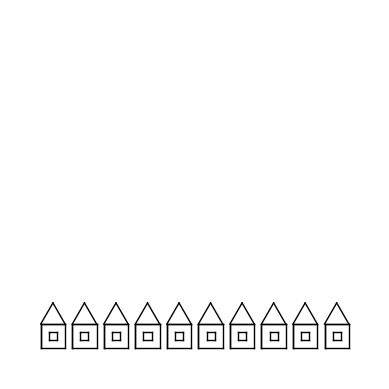

In [20]:
def house(x):
  square(x)
  t.forward(x)
  t.right(30)
  triangle(x)
  t.left(30)
  t.right(180)
  t.penup()
  t.forward(x/3)
  t.left(90)
  t.forward(x/3)
  t.pendown()
  square(x/3)
  # добавляем код для возврата черепашки
  # в исходное положение
  t.penup()
  t.forward(-x/3)
  t.left(90)
  t.forward(-2*x/3)
  t.pendown()


for i in range(10):
  house(100)
  t.penup()
  t.right(90)
  t.forward(100+30)
  t.left(90)
  t.pendown()

t.done()

А теперь по аналогии нарисуем целый квартал. Для этого мы используем **вложенные циклы**, т.е. один цикл внутри другого:

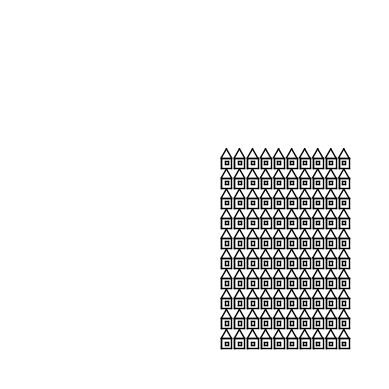

In [21]:

for j in range(10):
  # рисование улицы
  for i in range(10):
    house(100)
    t.penup()
    t.right(90)
    t.forward(100+30)
    t.left(90)
    t.pendown()
  t.penup()
  t.forward(-200)
  t.left(90)
  t.forward(130*10)
  t.right(90)
  t.pendown()

t.done()

## Псевдослучайные числа

In [22]:
import random

for i in range(10):
  print(random.randint(1,6))

1
1
5
3
5
5
2
3
3
2


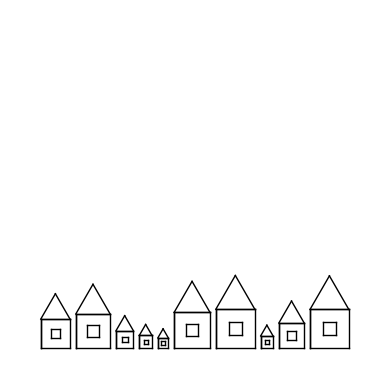

In [23]:
for i in range(10):
  size = random.randint(50,200)
  house(size)
  t.penup()
  t.right(90)
  t.forward(size+30)
  t.left(90)
  t.pendown()
t.done()

## Условный оператор

Предположим, мы хотим нарисовать некоторые домики с плоской крышей. В этом случае нам понадобится выполнять или не выполнять некоторые действия в зависимости от условия. Для этого пригодится **условный оператор**.

Для начала немного поэкспериментируем с условным оператором:

In [24]:
x = random.randint(0,100)-50
print(f"x={x}, x<0 = {x<0}")
if x<0:
  print('Отрицательное')
elif x==0:
  print('Ноль')
else:
  print('Неотрицательное')

x=-11, x<0 = True
Отрицательное


Мы видим, что выражение `x<0` - это выражение, которое может быть равно `True` (истина) или `False` (ложь). Говорят, что такое выражение имеет логический тип `bool`, и в частности мы можем присваивать такое значение переменным или передавать как параметры в функции.

Воспользуемся этим и добавим в функцию рисования дома параметр `roof`, который будет показывать, нужно ли рисовать у дома крышу. Внутри кода мы используем оператор `if`, чтобы рисовать крышу или нет в зависимости от этого параметра.

In [25]:
def house(x,roof=True):
  square(x)
  t.forward(x)
  if roof:
    t.right(30)
    triangle(x)
    t.left(30)
  t.right(180)
  t.penup()
  t.forward(x/3)
  t.left(90)
  t.forward(x/3)
  t.pendown()
  square(x/3)
  # добавляем код для возврата черепашки
  # в исходное положение
  t.penup()
  t.forward(-x/3)
  t.left(90)
  t.forward(-2*x/3)
  t.pendown()

house(100,False)

Теперь в коде рисования улицы будем передавать функции `house` случайный параметр рисования крыши. Выражение `random.randint(0,10)<=5` примерно в половине случаев будет иметь значение `True`, а в половине - `False`.

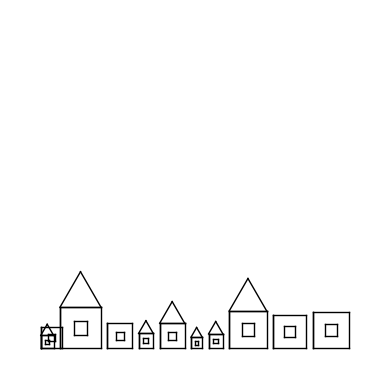

In [26]:
for i in range(10):
  size = random.randint(50,200)
  house(size,random.randint(0,10)<=5)
  t.penup()
  t.right(90)
  t.forward(size+30)
  t.left(90)
  t.pendown()
t.done()


## Рисование змейки

Посмотрим на ещё один пример использования условного оператора - это рисование змейки. Чтобы нарисовать змейку с помощью черепашки, нам нужно сначала поворачивать направо, а потом - налево, и так далее чередовать направления поворота. Это можно сделать в цикле с помощью оператора `if`, глядя на чётность или нечётность счетчика цикла. Выражение `i % 0` (остаток от деления `i` на 2) может быть равен 0 или 1.

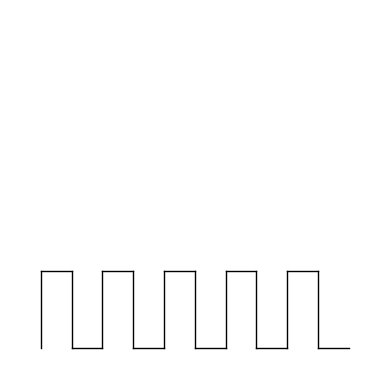

In [27]:
for i in range(10):
  t.forward(50)
  if i%2==0:
    t.right(90)
  else:
    t.left(90)
  t.forward(20)
  if i%2==0:
    t.right(90)
  else:
    t.left(90)
t.done()

Можно немного упростить код, задав угол поворота в виде переменной:

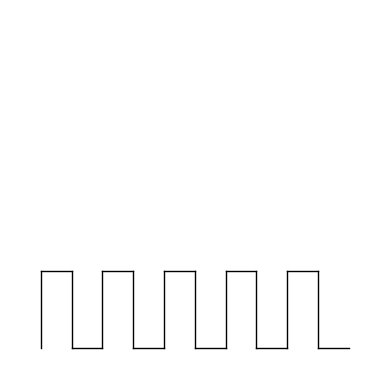

In [28]:
for i in range(10):
  if i%2==0:
    a=90
  else:
    a=-90
  t.forward(50)
  t.right(a)
  t.forward(20)
  t.right(a)
t.done()

Ещё более можно упростить код, используя **тернарный оператор if**, или оператор if для выражений. Конструкция `a if p else b` представляет собой выражение, которое равно `a`, если условие `p` истинно, и `b` в противном случае.

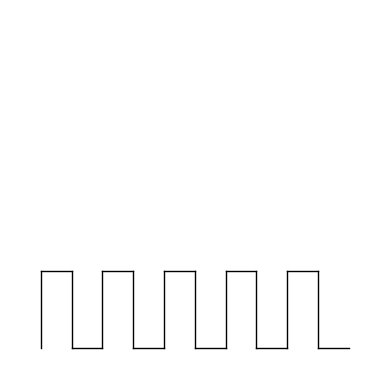

In [29]:
for i in range(10):
  a= 90 if i%2==0 else -90
  t.forward(50)
  t.right(a)
  t.forward(20)
  t.right(a)
t.done()

## Треугольник Серпинского

Теперь мы знаем всё, чтобы нарисовать нашу первую фрактальную фигуру - **[треугольник Серпинского](https://ru.wikipedia.org/wiki/%D0%A2%D1%80%D0%B5%D1%83%D0%B3%D0%BE%D0%BB%D1%8C%D0%BD%D0%B8%D0%BA_%D0%A1%D0%B5%D1%80%D0%BF%D0%B8%D0%BD%D1%81%D0%BA%D0%BE%D0%B3%D0%BE)**. Алгоритм его построения **методом случайных точек** описан [в статье](https://habr.com/ru/companies/itglobalcom/articles/753200/).

Мы выбираем координаты вершин треугольника $(x_0, y_0)$, $(x_1,y_1)$ и $(x_2,y_2)$ и начальные координаты точки $(x,y)$, после чего на каждом шаге выбираем случайную вершину $(x_i,y_i)$ и вычисляем новые координаты точки $(x,y)$ как середину отрезка между текущей точкой и выбранной вершиной.

Мы используем переменную $n$ (со значениями 0, 1 или 2) для выбора вершины.

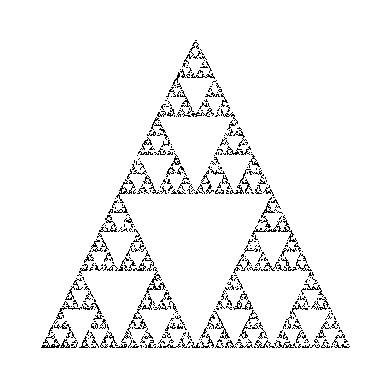

In [30]:
x0,y0 = 0,0
x1,y1 = 100,0
x2,y2 = 50,100

x,y = 50,50
for i in range(10000):
  n = random.randint(0,2)
  if n==0:
    x = (x+x0)/2
    y = (y+y0)/2
  elif n==1:
    x = (x+x1)/2
    y = (y+y1)/2
  else:
    x = (x+x2)/2
    y = (y+y2)/2
  t.point((x,y),pointstyle=',')

t.done()

В данной программе нам пришлось использовать оператор `if` с тремя вариантами, чтобы определить координаты вершины, к которой мы хотим двигаться. Тоже самое можно сделать с помощью списка координат точек `points`, при этом обращаясь к элементу списка по номеру - выражение `point[n]` сразу дает нам координаты случайно выбранной вершины.

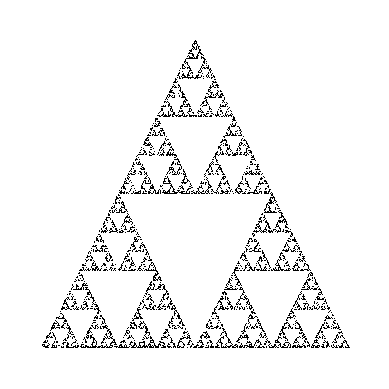

In [31]:
points = [(0,0),(100,0),(50,100)]

x,y = 50,50
for i in range(10000):
  n = random.randint(0,2)
  xn,yn = points[n]
  x = (x+xn)/2
  y = (y+yn)/2
  t.point((x,y),pointstyle=',')

t.done()

Ещё больше упростить код можно с использованием функции `random.choice` - она выбирает случайный элемент из заданного списка.

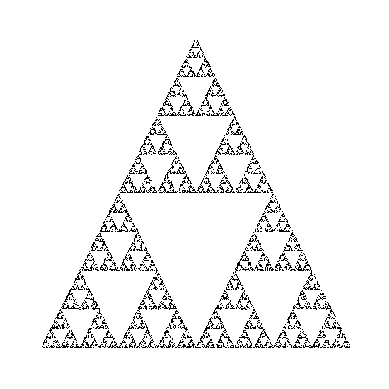

In [32]:
points = [(0,0),(100,0),(50,100)]

x,y = 50,50
for i in range(10000):
  xn,yn = random.choice(points)
  x = (x+xn)/2
  y = (y+yn)/2
  t.point((x,y),pointstyle=',')

t.done()

## Високосный год

Известно, что високосный год - это такой, номер которого делится на 4, но при этом не делится на 100. Но при этом также год, номер которого делится на 400, является високосным.

Для определения високосности года используем **логическое выражение** со связками `and`, `or` и `not`.

In [33]:
for y in [2000,2024,2013,1930,1900]:
  if (y%4==0 and not(y%100==0)) or (y%400==0):
    print(f'{y} - високосный год')
  else:
    print(f'{y} - невисокосный год')

2000 - високосный год
2024 - високосный год
2013 - невисокосный год
1930 - невисокосный год
1900 - невисокосный год


## Цикл while

Иногда нам нужно выполнять цикл не заранее заданное число раз, а до выполнения какого-то условия. Например, посмотрим, сколько лет потребуется, чтобы накопить миллион рублей, если вложить 100 тысяч под процентную ставку 18% годовых.

In [34]:
p = 0.18
x = 100000
n = 1

while x<1000000:
  n+=1
  x = x*(1+p)
  print(f"Год {n}, сумма = {x}")

print(f'Результат = {n}')

Год 2, сумма = 118000.0
Год 3, сумма = 139240.0
Год 4, сумма = 164303.19999999998
Год 5, сумма = 193877.77599999998
Год 6, сумма = 228775.77567999996
Год 7, сумма = 269955.41530239995
Год 8, сумма = 318547.39005683194
Год 9, сумма = 375885.9202670617
Год 10, сумма = 443545.38591513276
Год 11, сумма = 523383.5553798566
Год 12, сумма = 617592.5953482308
Год 13, сумма = 728759.2625109123
Год 14, сумма = 859935.9297628765
Год 15, сумма = 1014724.3971201942
Результат = 15


Циклы можно комбинировать между собой. Например, напечатаем табличку количества лет для различных процентных ставок:

In [35]:
print('|--------|-----|')
print('| Ставка | Лет |')
print('|--------|-----|')
for p in [0.05,0.08, 0.1, 0.13, 0.15, 0.18]:
  x = 100000
  n = 1
  while x<1000000:
    n+=1
    x = x*(1+p)
  print(f'| {p:6.2f} |  {n} |')
print('|--------|-----|')


|--------|-----|
| Ставка | Лет |
|--------|-----|
|   0.05 |  49 |
|   0.08 |  31 |
|   0.10 |  26 |
|   0.13 |  20 |
|   0.15 |  18 |
|   0.18 |  15 |
|--------|-----|


Ещё одно применение цикла `while` в рисовании - это проверить, что мы повернулись на заданный угол. Попробуем нарисовать случайную спиральку:

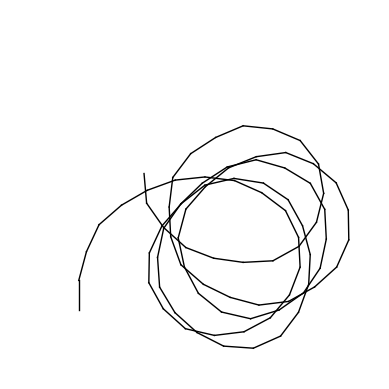

In [40]:
angle = 0
while angle<360*5:
  t.forward(5)
  a = random.randint(10,30)
  angle += a
  t.right(a)
t.done()

## Визуализируем число Пи

Пример ниже вдохновлён заметкой [красота Пи](https://public.tableau.com/shared/QJ5PHW26D), в которой приводится 10 разных визуализаций. Построим визуализацию, в которой на двух параллельных прямых отложены 10 точек для цифр от 0 до 9, и мы соединяем прямой две последовательно идущих цифры числа Пи.

Для начала импортируем библиотеку `math` и посмотрим на число Pi:

In [37]:
import math
math.pi

3.141592653589793

Чтобы выделять цифры числа последовательно, воспользуемся математическими операциями.

1. Начнём с исходного числа 3.1415926...
2. Его первая цифра - это целая часть, 3.
3. Вычтя из числа целую часть, получим дробный остаток 0.1415926...
4. Умножив это на 10, мы получим число 1.5926..., первая цифра которого равна очередной цифре исходного числа. Перейдём к шагу 2.

In [42]:
x = math.pi
for i in range(50):
  d = int(x)
  print(d, end=' ')
  x = 10*(x-d)

3 1 4 1 5 9 2 6 5 3 5 8 9 7 9 3 1 1 5 9 9 7 9 6 3 4 6 8 5 4 4 1 8 5 1 6 1 5 9 0 5 7 6 1 7 1 8 7 5 0 

Теперь нам нужно научиться запоминать предыдущую цифру, чтобы сгруппировать цифры в пары. Для этого используем ещё одну переменную `p`:

In [43]:
x = math.pi
p = None
for i in range(50):
  d = int(x)
  print(p,d)
  x = 10*(x-d)
  p = d

None 3
3 1
1 4
4 1
1 5
5 9
9 2
2 6
6 5
5 3
3 5
5 8
8 9
9 7
7 9
9 3
3 1
1 1
1 5
5 9
9 9
9 7
7 9
9 6
6 3
3 4
4 6
6 8
8 5
5 4
4 4
4 1
1 8
8 5
5 1
1 6
6 1
1 5
5 9
9 0
0 5
5 7
7 6
6 1
1 7
7 1
1 8
8 7
7 5
5 0


Теперь мы можем вместо того, чтобы печатать цифры, рисовать прямые, соединяющие цифры на нижней и верхней прямой. Для этого используем возможость построения линий в библиотеке `jturtle` с помощью команды `line`:

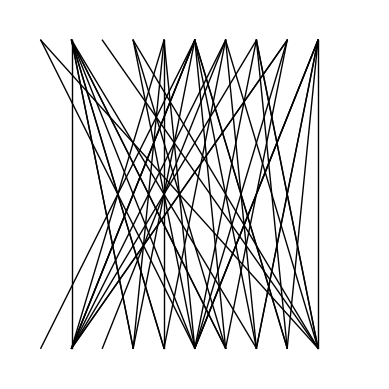

In [44]:
x = math.pi
p = None
for i in range(50):
  d = int(x)
  if p is not None:
    t.line((p*10,0),(d*10,100))
  x = 10*(x-d)
  p = d
t.done()

Осталось добавить, чтобы линия не прерывалась, т.е. чтобы мы сначала рисовали линию снизу вверх, а на следующем шаге - сверху вниз. Для этого используем уже знакомый нам приём в проверкой чётности счетчика цикла `i`:

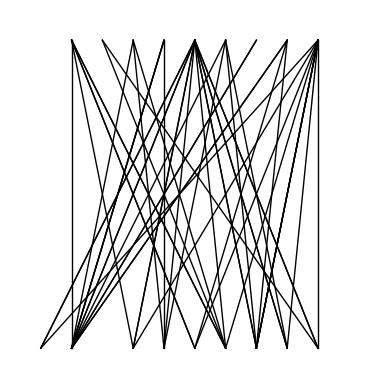

In [45]:
x = math.pi
p = None
for i in range(50):
  d = int(x)
  y = 0 if i%2==0 else 100
  if p is not None:
    t.line((p*10,y),(d*10,100-y))
  x = 10*(x-d)
  p = d
t.done()

В заключении, для красоты раскрасим линии в разные цвета:

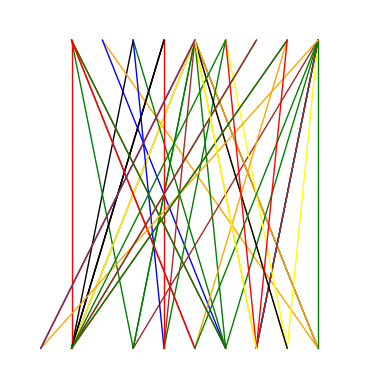

In [39]:
x = math.pi
p = None
colors = ['red','green','blue','yellow','brown','orange','black']
for i in range(50):
  d = int(x)
  y = 0 if i%2==0 else 100
  if p is not None:
    t.ensureTurtle().color = random.choice(colors)
    t.line((p*10,y),(d*10,100-y))
  x = 10*(x-d)
  p = d
t.done()